# Lista 1 - Física Computacional II
Aluna: Ylana Karolina Santos Lopes

In [173]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import rfft, irfft
from dcst import dct, idct


## Problema 1
### a)

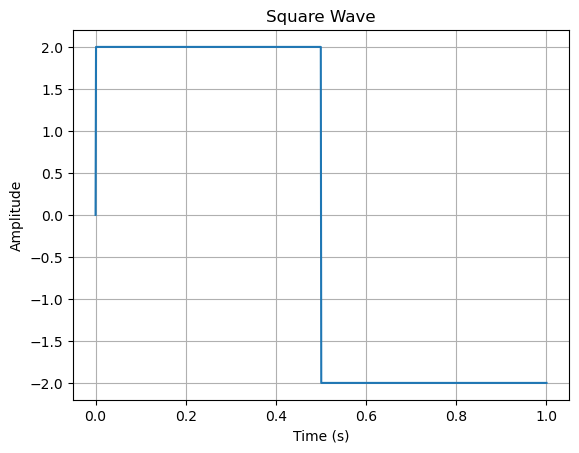

In [33]:
def square_wave(t):
    return np.sign(np.sin(2 * np.pi * t))

N = 1000

t = np.linspace(0, 1, N)
amplitude = 2
wave = amplitude * square_wave(t)

plt.plot(t, wave)
plt.title("Square Wave")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

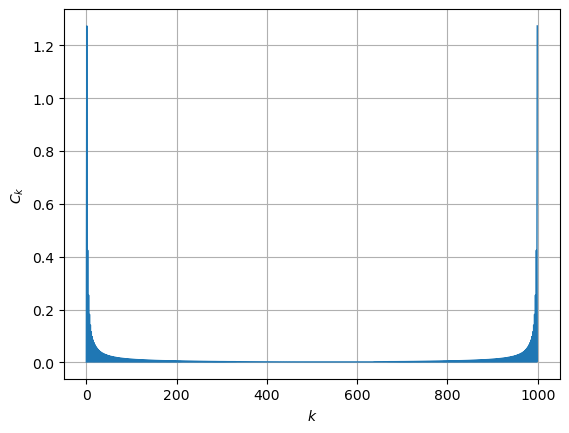

In [36]:
y = wave
ck = []

for k in range(N):
    c = 0.0
    for n in range(N):
        c = c + y[n]*np.exp(-1j*2*np.pi*k*n/N)
    ck.append(c)

ck = np.array(ck)
gammak = ck/N

plt.grid()
plt.plot(abs(gammak), lw = 1)
plt.xlabel(r'$k$')
plt.ylabel(r'$C_{k}$')
plt.show()

### b)

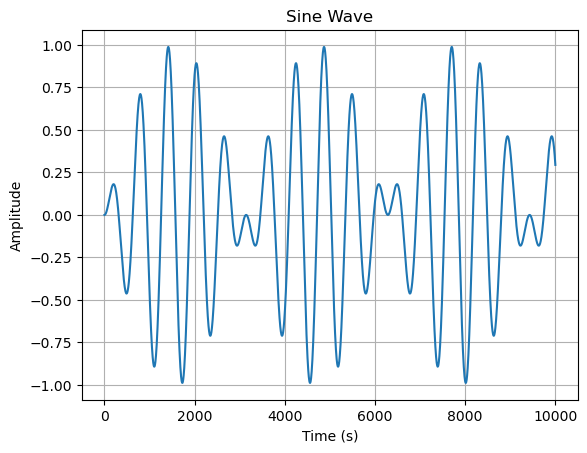

In [66]:
def sine_wave(n):
    return np.sin((np.pi*n)/N) * np.sin((10*np.pi*n)/N)

t = np.linspace(0, 1000, N)
wave = sine_wave(t)

plt.plot(t, wave)
plt.title("Sine Wave")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

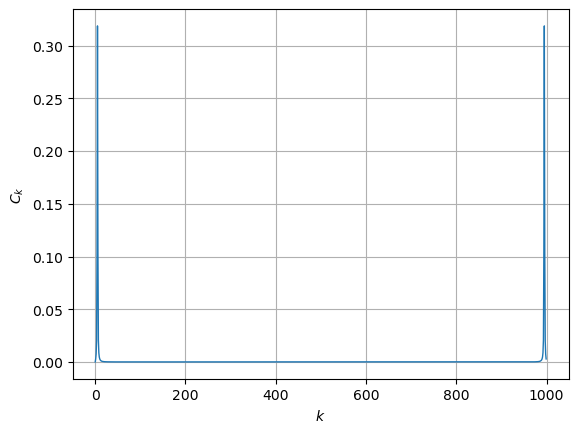

In [43]:
y = wave
ck = []

for k in range(N):
    c = 0.0
    for n in range(N):
        c = c + y[n]*np.exp(-1j*2*np.pi*k*n/N)
    ck.append(c)

ck = np.array(ck)
gammak = ck/N

plt.grid()
plt.plot(abs(gammak), lw = 1)
plt.xlabel(r'$k$')
plt.ylabel(r'$C_{k}$')
plt.show()

## Problema 2: Detectando a periodicidade de uma sinal
### a) 
Observando o intervalo entre um pico e outro, podemos estimar que o período está entre 125 e 160 meses.

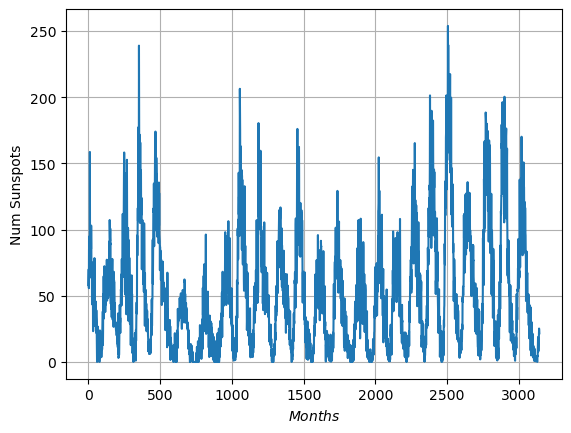

In [46]:
data = np.loadtxt('sunspots.txt')
time = data[:,0]
spots = data[:,1]

plt.plot(time, spots)
plt.ylabel(r'Num Sunspots')
plt.xlabel(r'$Months$')
plt.grid()

### b)

In [54]:
def mag_sq(data):
    return abs(data)**2

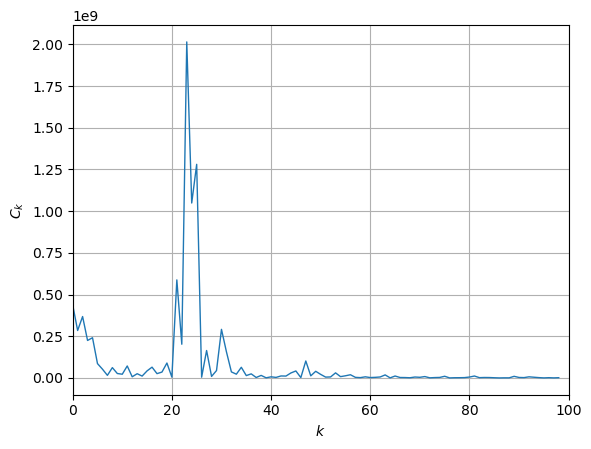

In [61]:
y = spots
ck = []
N = len(y)


for k in range(N):
    c = 0.0
    for n in range(N):
        c = c + y[n]*np.exp(-1j*2*np.pi*k*n/N)
    ck.append(c)

ck = np.array(ck)
#gammak = ck/N

plt.grid()
plt.plot(list(map(mag_sq, ck))[1:100], lw = 1) ## pega só os de index 1 a 100 para aparecer mais.
plt.xlabel(r'$k$')
plt.ylabel(r'$C_{k}$')
plt.xlim(0,100)
plt.show()

Podemos ver um pico em ~23.

### c) 
Vendo o pico em $k = 23$, levamos em conta o fator de normalização - nesse caso o tamanho da tabela para encontrarmos o período:

$$ P = \frac{len(dados)}{k} = \frac{3143}{23} $$

$$ P \approxeq 136  meses $$


## Problema 3: Transformada de Fourier de instrumentos musicais
### a)

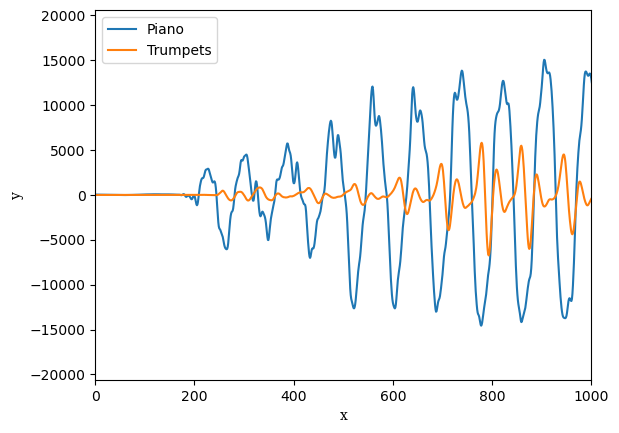

In [91]:
piano = np.loadtxt('piano.txt')
trump = np.loadtxt('trumpet.txt')


plt.plot(piano[0:10000], label = 'Piano', )
plt.plot(trump[0:10000], label = 'Trumpets')
plt.xlim(0,1000)
plt.xlabel('x', family='serif')
plt.ylabel('y', family='serif')
plt.legend()

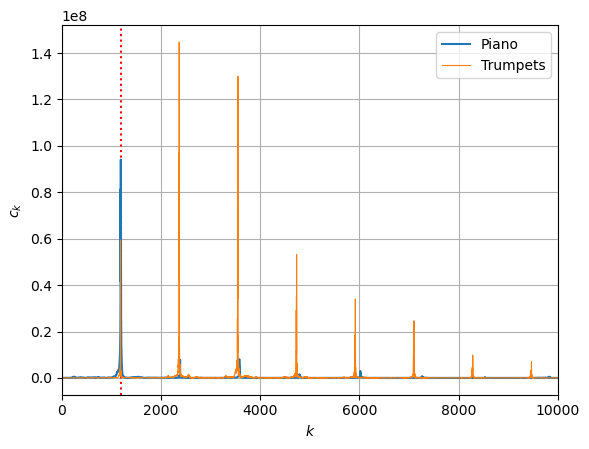

In [135]:
y = piano
N = len(y)

plt.axvline(1190, color = 'red', ls = ':')

ck = rfft(y)
gammak = ck/N
plt.plot(abs(ck), label = 'Piano')


y = trump
N = len(y)

ck = rfft(y)
gammak = ck/N
plt.xlabel('$k$', family='serif')
plt.ylabel(r'$c_{k}$')
plt.xlim(0,10000)
plt.plot(abs(ck), label = 'Trumpets', lw = 0.8)
plt.grid()
plt.legend()
plt.show()



Podemos chegar a conclusão que os tons dos instrumentos são bem diferentes, apesar de estarem tocando a mesma nota.

### b)

In [132]:
### O primeiro pico encontramos que está localizado mais ou menos em k = 1190

pico = 1190

freq = 44100 * pico/ 100000
freq

524.79

A frequência é aproximadamente 2x a do dó central.

## Problema 4: Filtragem de Fourier e suavização
### a)

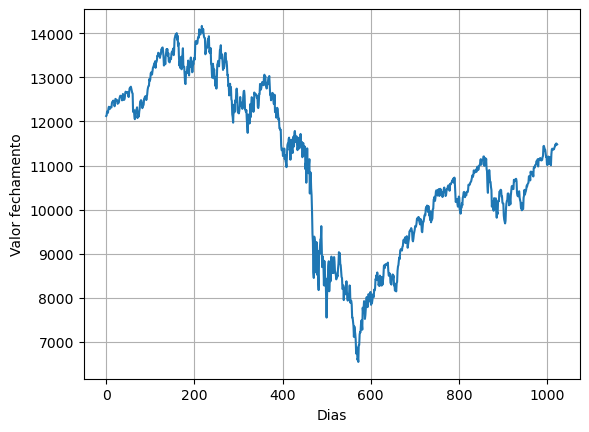

In [162]:
dow = np.loadtxt('dow.txt')

plt.plot(dow)
plt.ylabel('Valor fechamento')
plt.xlabel('Dias')
plt.grid()

### b)

In [163]:
k = np.fft.rfft(dow)


### c)

In [164]:
porc_10 = int(0.1*len(k))

for i in range(porc_10, len(k), 1):
    k[i] = 0

### d)

In [165]:
k_inv = np.fft.irfft(k)

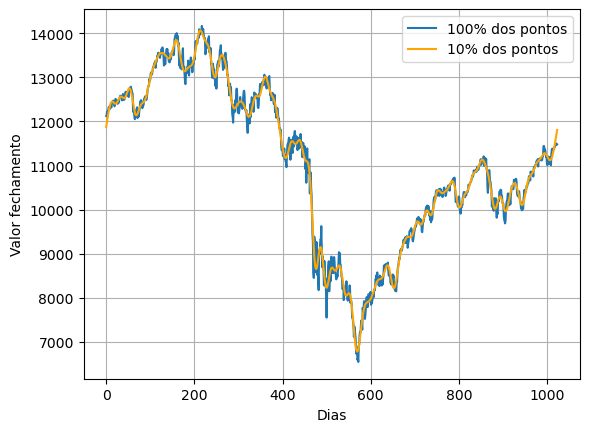

In [166]:
plt.plot(dow, label='100% dos pontos')
plt.plot(k_inv, color='orange', label='10% dos pontos')
plt.ylabel('Valor fechamento')
plt.xlabel('Dias')
plt.legend()
plt.grid()

Ele meio que reduz o ruído dos dados, deixando a curva mais suave.

### e)

In [157]:
k = np.fft.rfft(dow)

porc_2 = int(0.02*len(k))

for i in range(porc_2, len(k), 1):
    k[i] = 0


k_inv = np.fft.irfft(k)

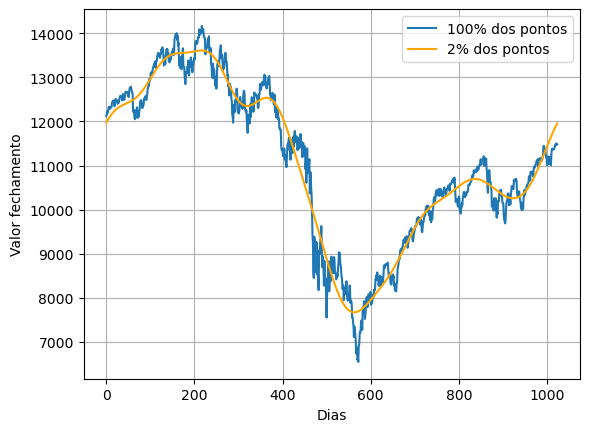

In [158]:
plt.plot(dow, label='100% dos pontos')
plt.plot(k_inv, color='orange', label='2% dos pontos')
plt.ylabel('Valor fechamento')
plt.xlabel('Dias')
plt.legend()
plt.grid()

## Problema 5

In [178]:
def square_wave(t):
    return np.sign(np.sin(2 * np.pi * t))

N = 1000

t = np.linspace(0, 1, N)
amplitude = 1
wave = amplitude * square_wave(t)

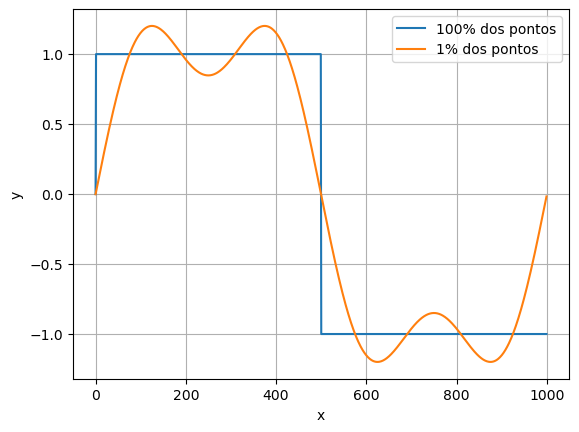

In [183]:
data = wave

k = np.fft.rfft(data)

porc_1 = int(0.01*len(k))

for i in range(porc_1, len(k), 1):
    k[i] = 0


k_inv = np.fft.irfft(k)


plt.plot(data, label='100% dos pontos')
plt.plot(k_inv, label='1% dos pontos')
plt.ylabel('y')
plt.xlabel('x')
plt.grid()
plt.legend()

Essas oscilações vem da necessidade da curva de ser senoidal, causando essas oscilações em dados com comportamento constante.

## Problema 6: Comparação de DFT e DCT
### a)

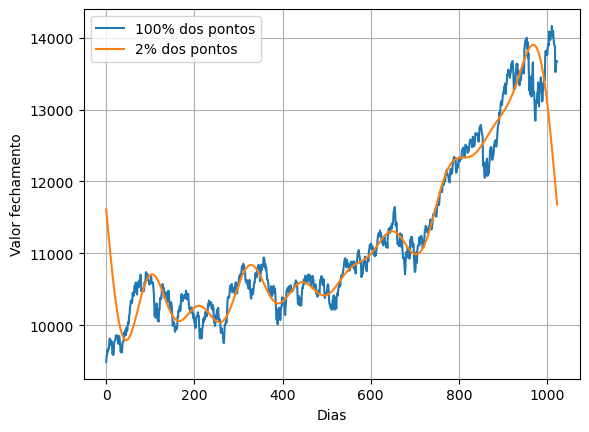

In [176]:
dow2 = np.loadtxt('dow2.txt')

k = np.fft.rfft(dow2)

porc_2 = int(0.02*len(k))

for i in range(porc_2, len(k), 1):
    k[i] = 0


k_inv = np.fft.irfft(k)


plt.plot(dow2, label='100% dos pontos')
plt.plot(k_inv, label='2% dos pontos')
plt.ylabel('Valor fechamento')
plt.xlabel('Dias')
plt.grid()
plt.legend()

### b)

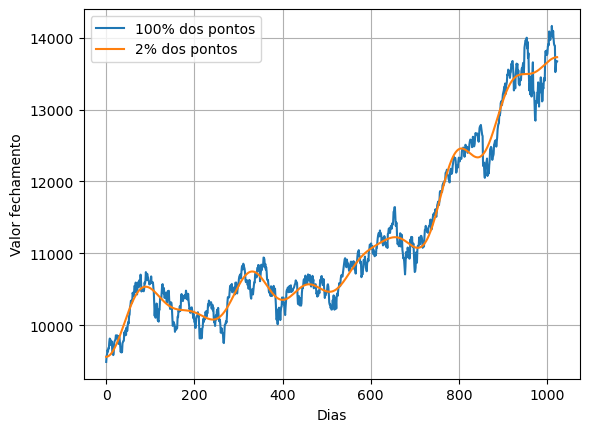

In [177]:
k = dct(dow2)

porc_2 = int(0.02*len(k))

for i in range(porc_2, len(k), 1):
    k[i] = 0


k_inv = idct(k)


plt.plot(dow2, label='100% dos pontos')
plt.plot(k_inv, label='2% dos pontos')
plt.ylabel('Valor fechamento')
plt.xlabel('Dias')
plt.grid()
plt.legend()